AUTHOR : HAMORA HADI

In [0]:
import split_folders
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
print(tf.__version__)

2.2.0


In [5]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-28 16:55:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.88MB/s    in 39s     

2020-05-28 16:56:14 (7.82 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [7]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/hasil_split", seed=1337, ratio=(.8, .1, .1))

Copying files: 2188 files [00:00, 2979.01 files/s]


In [0]:
base_dir = '/tmp/rockpaperscissors/hasil_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
os.listdir('/tmp/rockpaperscissors/hasil_split/train')

['scissors', 'rock', 'paper']

In [10]:
os.listdir('/tmp/rockpaperscissors/hasil_split/val')

['scissors', 'rock', 'paper']

In [0]:
train_rock_dir = os.path.join(train_dir, 'rock') 
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock') 
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [0]:
train_datagen = ImageDataGenerator( 
                    rescale=1./255, 
                    rotation_range=20, 
                    horizontal_flip=True, 
                    shear_range = 0.2, 
                    fill_mode = 'nearest') 

test_datagen = ImageDataGenerator( 
                    rescale=1./255,
                    rotation_range=20, 
                    horizontal_flip=True, 
                    shear_range = 0.2, 
                    fill_mode = 'nearest') 

In [13]:
train_generator = train_datagen.flow_from_directory( 
        train_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory( 
        validation_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical') 

Found 1749 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3) ),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax'),
])                               

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']) 

In [16]:
model.fit( 
      train_generator, 
      steps_per_epoch=25, 
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2) 

Epoch 1/20
25/25 - 1s - loss: 0.6586 - accuracy: 0.3400 - val_loss: 0.6352 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 1s - loss: 0.6276 - accuracy: 0.3600 - val_loss: 0.5762 - val_accuracy: 0.5500
Epoch 3/20
25/25 - 1s - loss: 0.5805 - accuracy: 0.5400 - val_loss: 0.5325 - val_accuracy: 0.5500
Epoch 4/20
25/25 - 1s - loss: 0.5591 - accuracy: 0.5900 - val_loss: 0.5341 - val_accuracy: 0.6500
Epoch 5/20
25/25 - 1s - loss: 0.5205 - accuracy: 0.6400 - val_loss: 0.6964 - val_accuracy: 0.3500
Epoch 6/20
25/25 - 1s - loss: 0.4192 - accuracy: 0.7100 - val_loss: 0.4369 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 1s - loss: 0.4350 - accuracy: 0.7800 - val_loss: 0.2440 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 1s - loss: 0.2168 - accuracy: 0.9000 - val_loss: 0.3068 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 1s - loss: 0.2178 - accuracy: 0.8900 - val_loss: 0.3616 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 1s - loss: 0.3736 - accuracy: 0.8200 - val_loss: 0.2998 - val_accuracy: 0.9000
Epoch 11/20
25/25 -

Saving 1Dfw5FRlS4h60JPX.png to 1Dfw5FRlS4h60JPX.png
[[1. 0. 0.]]
Gambar (upload) merupakan gambar 
Kertas (Paper)


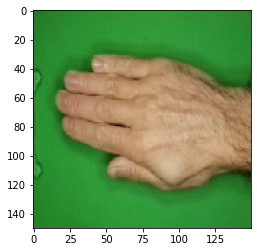

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path,target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size=25)
  print(classes)
  list(classes)

  #print(fn)
  print("Gambar (upload) merupakan gambar ")
  if classes[0,0]==1:
    print("Kertas (Paper)")
  elif classes[0,1]==1:
    print("Batu (Rock)")
  elif classes[0,2]==1:
    print("Gunting (Scissors)")
  else:
    print("Bukan gambar batu, gunting maupun kertas")